# Performing Exploratory Data Analysis for Student Retention

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Prep plotting aesthetics
# Set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
# Set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
# Set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")

data.head()

,Unnamed: 0,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


Since we are focusing on retention rates, we are renaming the variable names for the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions" in order to improve identification of the main variables.

In [3]:
# First-time, full-time student retention rate at four-year institutions
four_yr_retention = data.RET_FT4

# First-time, full-time student retention rate at less-than-four-year institutions
less_four_yr_retention = data.RET_FTL4

## Histograms for Retention Rates

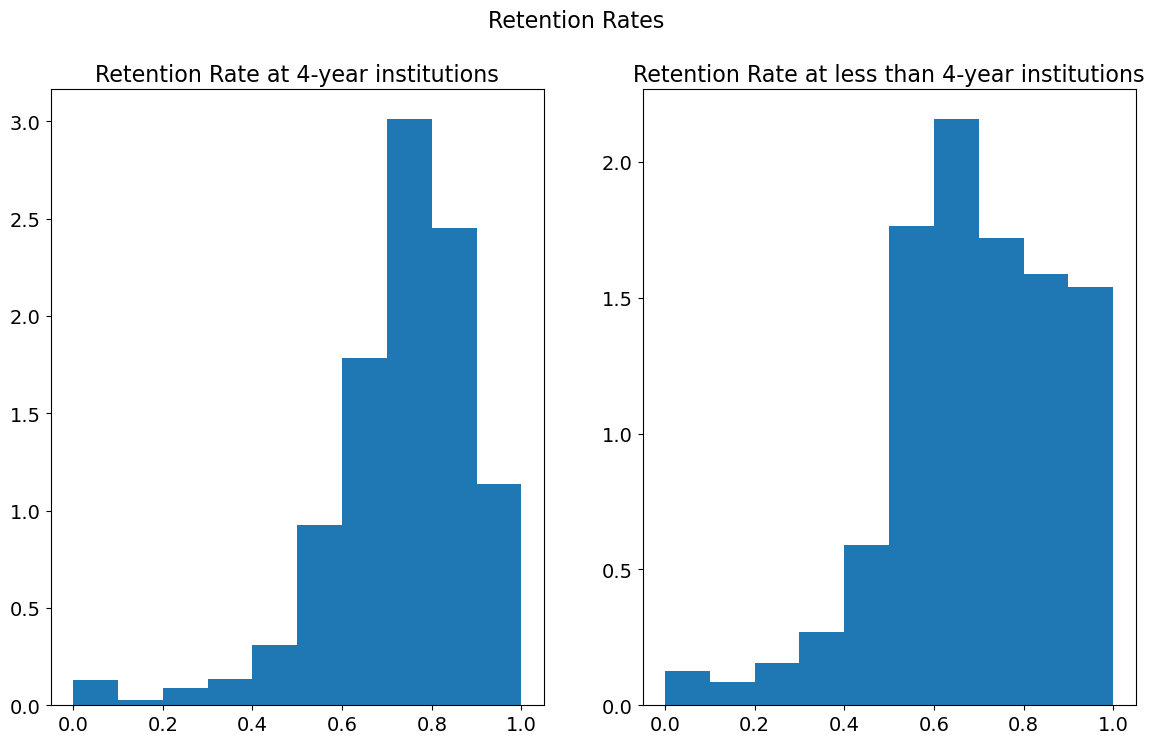

<Figure size 1400x800 with 0 Axes>

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(four_yr_retention, density = True)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(less_four_yr_retention, density = True)

plt.show()
plt.savefig('figures/figure_1.png')

Based on the histograms, we notice that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

## How does the control of the school affect retention rates?

#### Public Schools

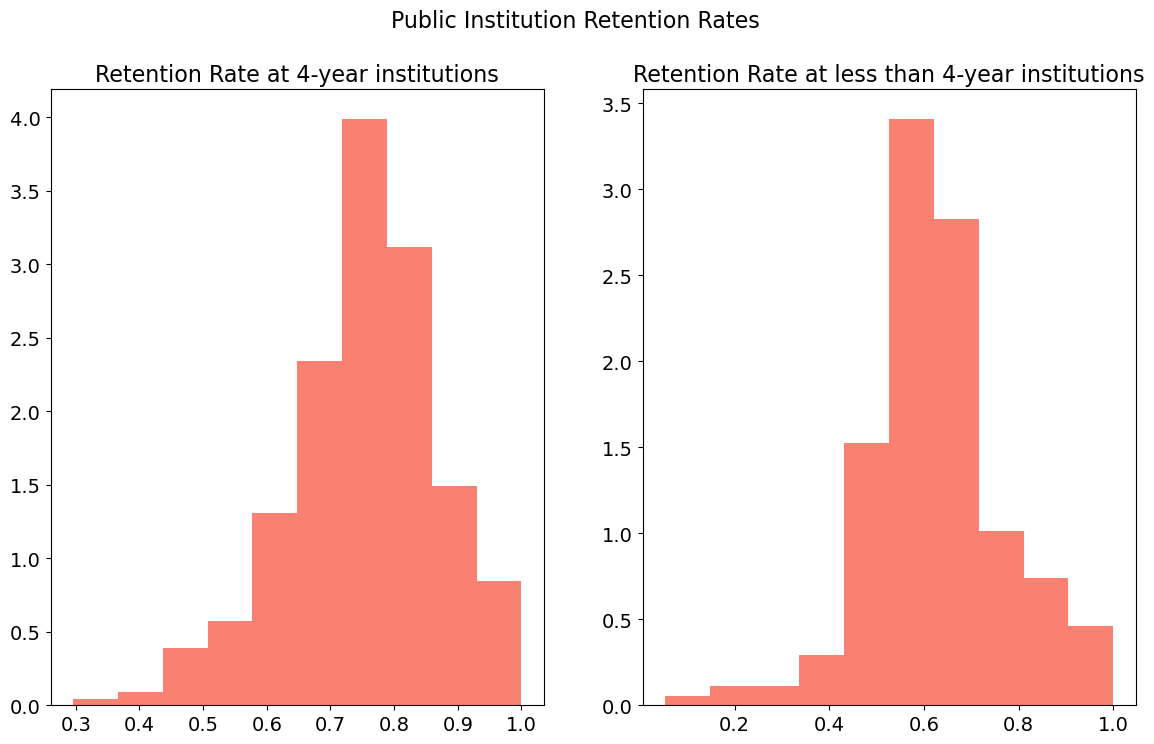

In [5]:
public = data.loc[data["CONTROL"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Public Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(public.RET_FT4, density = True, color = "salmon")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(public.RET_FTL4, density = True, color = "salmon")

plt.show()

For public schools, the retention rates severely declines as the left-skewed distribution transforms into a normal distribution. The change is more noticeable in the retention rates of less than 4-year public institutions.

#### Private Non-Profit

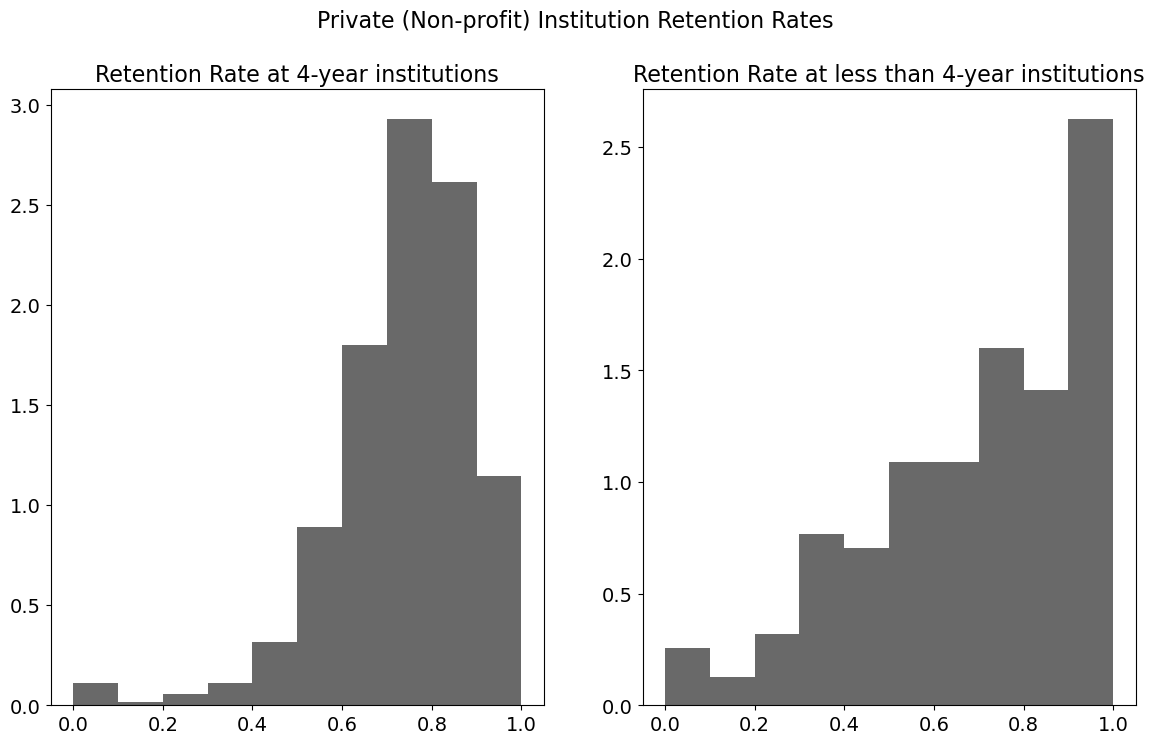

In [6]:
private_non_profit = data.loc[data["CONTROL"] == 2]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (Non-profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_non_profit.RET_FT4, density = True, color = "dimgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_non_profit.RET_FTL4, density = True, color = "dimgray")

plt.show()

In the case of non-profit private institutions, the retention rates for 4-year institutions appears to remain with the same. However, the retention for less than 4-year institution increases with the density focused in the 100% retention rate. 

#### Private For-Profit

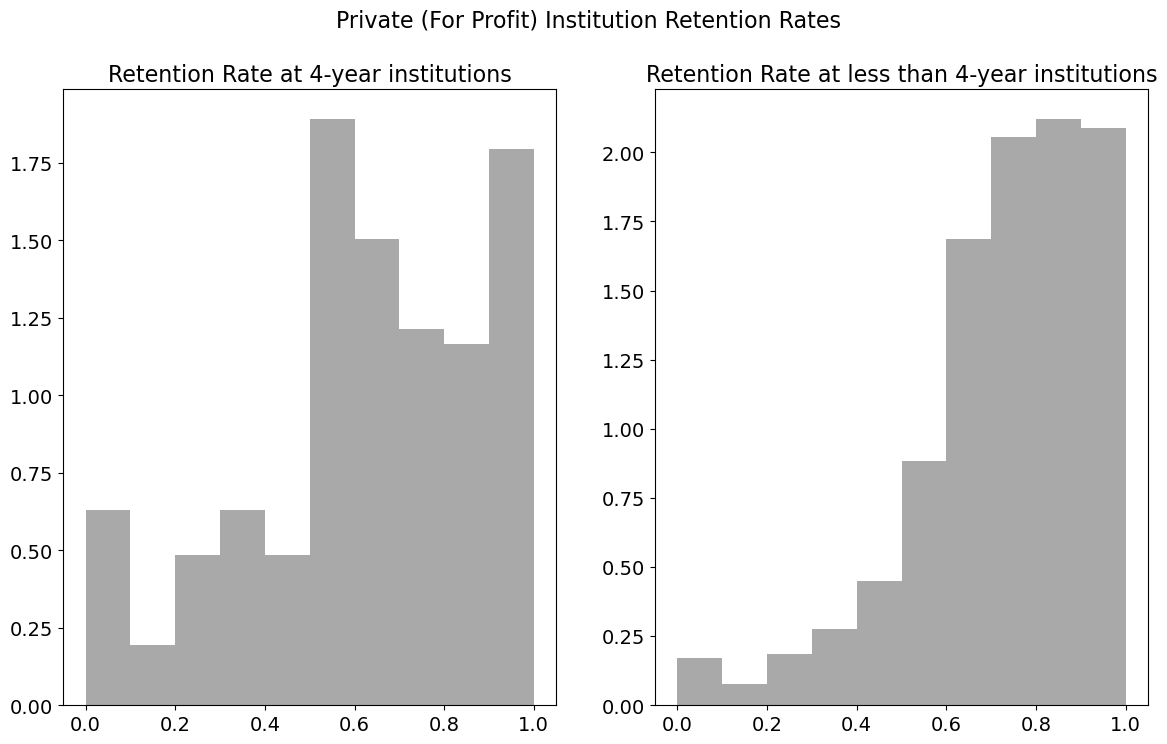

In [7]:
private_profit = data.loc[data["CONTROL"] == 3]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_profit.RET_FT4, density = True, color = "darkgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_profit.RET_FTL4, density = True, color = "darkgray")

plt.show()

As for-profit private institutions, the retention rate for 4-year institutions maintains a left skewed distribution. However, a spike appears around the the 50% mark which indicates a slightly worse retention than the overall. As for the less than 4-year institution, the retention increases similarly to the non-profit institution as the density is focused on the higher end of the retention rates.

### Does Admission Rates affect Retention Rates?

In [35]:
def filter_rows_with_values(df):
    """
    Input: a Pandas DataFrame with two columns 
    Output: returns a new DataFrame with only the rows that have values in both columns
    """
    # Check that the input DataFrame has exactly two columns
    if len(df.columns) != 2:
        raise ValueError("Input DataFrame must have exactly two columns")

    # Use pandas' built-in methods to check which cells have numbers
    is_numeric = pd.to_numeric(df.iloc[:, 0], errors="coerce").notnull() & pd.to_numeric(df.iloc[:, 1], errors="coerce").notnull()

    # Filter the DataFrame to keep only the rows with numbers in both columns
    filtered_df = df.loc[is_numeric]

    return filtered_df

In [42]:
# Creating filtered data for 4-year institutions
adm_rate_and_four_year = data[['ADM_RATE','RET_FT4']].copy()
filtered_adm_rate_and_four_year = filter_rows_with_values(adm_rate_and_four_year)

# Creating filtered data for less than 4-year institutions
adm_rate_and_less_four_year = data[['ADM_RATE','RET_FTL4']].copy()
filtered_adm_rate_and_less_four_year = filter_rows_with_values(adm_rate_and_less_four_year)

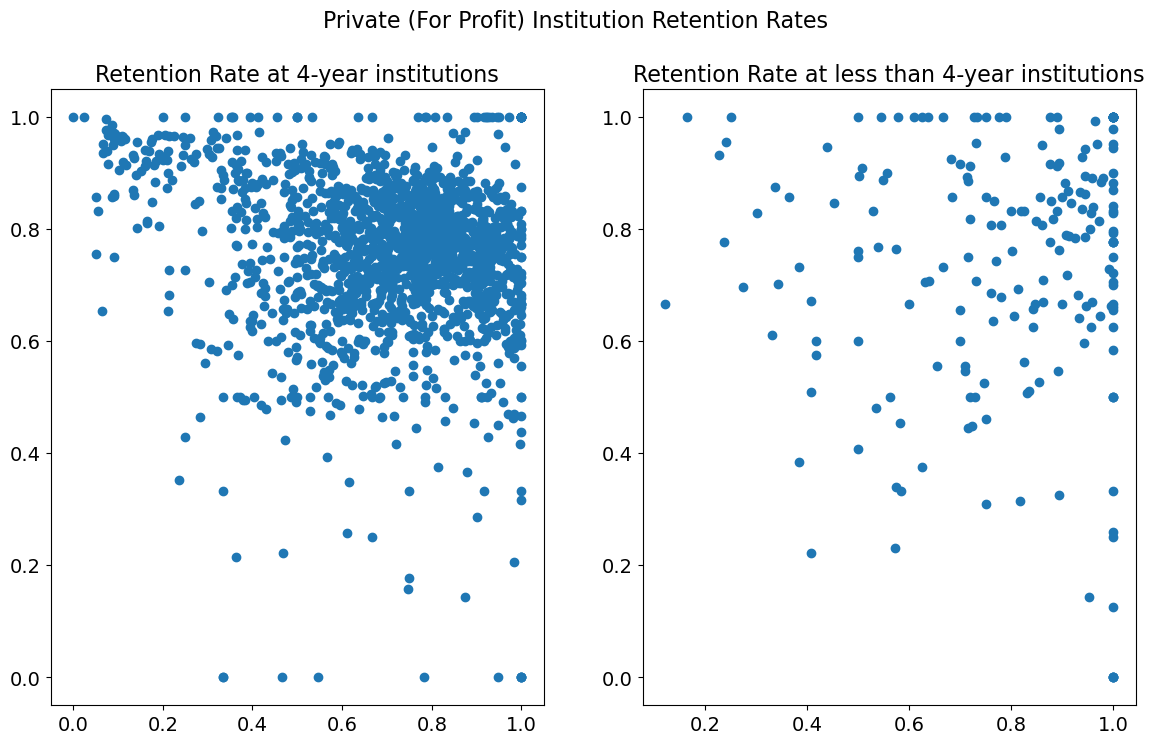

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.scatter(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.scatter(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

plt.show()

In [34]:
# Pearson correlation coefficient 
def pearson_corr_coef(x, y):
    """
    Input: two lists of equal length
    Output: returns an array with the Pearson correlation coefficient
    """
    # Checking if the values in the list are the same
    if len(x) !=  len(y):
        raise ValueError("Input lists must have the same length")

    # Find Covariance
    covariance = np.cov(x, y)

    # Standard deviation of x and y
    stdx = np.std(x)
    stdy = np.std(y)

    # Returning Correlation coefficient
    return covariance / (stdx * stdy)

In [45]:
# 4-year
pearson_corr_coef(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)
# less than 4-year
pearson_corr_coef(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

array([[ 0.9656183 , -0.01185325],
       [-0.01185325,  1.04609297]])

In [23]:
data.corr(ADM_RATE)

/tmp/ipykernel_390/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,UNITID,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,CCUGPROF,CCSIZSET,...,RET_FT4,RET_FTL4,PCTFLOAN,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
Unnamed: 0,1.000000,0.445609,-0.502412,0.383334,0.238388,0.075708,-0.112129,NaN,-0.370742,-0.405305,...,-0.142483,0.185571,0.127871,-0.134881,0.134404,-0.104056,-0.149668,0.210140,-0.149836,0.023068
UNITID,0.445609,1.000000,-0.426823,0.064775,-0.006523,-0.000812,-0.134543,NaN,-0.421119,-0.446859,...,-0.171811,0.200152,0.138826,-0.156301,0.155931,-0.098159,-0.178923,0.229403,-0.145223,-0.008067
HIGHDEG,-0.502412,-0.426823,1.000000,-0.321941,0.032880,-0.047155,-0.032000,NaN,0.804949,0.893924,...,0.103157,-0.308855,0.065165,0.276976,-0.275602,0.074336,0.091629,-0.363369,0.186748,-0.029799
CONTROL,0.383334,0.064775,-0.321941,1.000000,-0.021852,0.076284,-0.310171,NaN,-0.329088,-0.416204,...,-0.170973,0.251188,0.438984,-0.269132,0.265981,-0.183369,-0.186695,0.299296,-0.436005,0.133843
ST_FIPS,0.238388,-0.006523,0.032880,-0.021852,1.000000,-0.088331,0.049939,NaN,0.046212,0.007673,...,-0.002226,-0.014998,-0.040162,0.009511,-0.009353,-0.058970,-0.004472,-0.031855,0.000027,0.088463
REGION,0.075708,-0.000812,-0.047155,0.076284,-0.088331,1.000000,-0.120349,NaN,-0.085574,-0.067323,...,-0.121794,0.016524,-0.167226,-0.027897,0.024141,-0.008127,-0.125764,0.021018,0.124389,-0.124017
LOCALE,-0.112129,-0.134543,-0.032000,-0.310171,0.049939,-0.120349,1.000000,NaN,0.003490,-0.046400,...,-0.064328,-0.110070,-0.136681,0.047031,-0.050947,-0.156893,-0.082118,-0.128755,0.127202,-0.001256
LOCALE2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCUGPROF,-0.370742,-0.421119,0.804949,-0.329088,0.046212,-0.085574,0.003490,NaN,1.000000,0.756170,...,0.297816,-0.279213,0.101890,0.299597,-0.293399,0.176185,0.347334,-0.315341,0.167887,0.042530
CCSIZSET,-0.405305,-0.446859,0.893924,-0.416204,0.007673,-0.067323,-0.046400,NaN,0.756170,1.000000,...,0.285531,-0.316922,0.011449,0.278200,-0.274910,0.305205,0.324530,-0.360188,0.169298,-0.029927
